In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error ,r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')

In [21]:
df=pd.read_csv('Advertising.csv')

In [22]:
df.head(10)

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
5,6,8.7,48.9,75.0,7.2
6,7,57.5,32.8,23.5,11.8
7,8,120.2,19.6,11.6,13.2
8,9,8.6,2.1,1.0,4.8
9,10,199.8,2.6,21.2,10.6


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [24]:
def summary(df):
    sum = pd.DataFrame(df.dtypes, columns = ['dtypes'])
    sum['missing#'] = df.isna().sum()
    sum['missing%'] = (df.isna().sum().values*100)/len(df)
    sum['uniques'] = df.count().values
    desc = pd.DataFrame(df.describe().T)
    sum['min'] = desc['min']
    sum['max'] = desc['max']
    sum['mean'] = desc['mean']
    return sum
summary(df).style.background_gradient(cmap='Blues')

,dtypes,missing#,missing%,uniques,min,max,mean
Unnamed: 0,int64,0,0.000000,200,1.000000,200.000000,100.500000
TV,float64,0,0.000000,200,0.700000,296.400000,147.042500
Radio,float64,0,0.000000,200,0.000000,49.600000,23.264000
Newspaper,float64,0,0.000000,200,0.300000,114.000000,30.554000
Sales,float64,0,0.000000,200,1.600000,27.000000,14.022500


In [25]:
df.duplicated().sum()

0

In [26]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [27]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

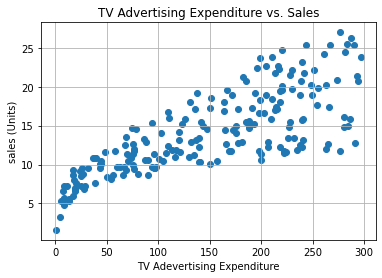

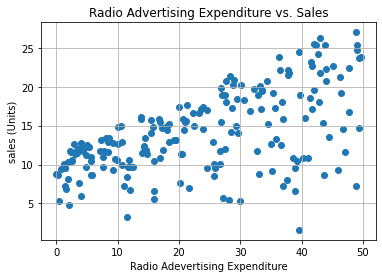

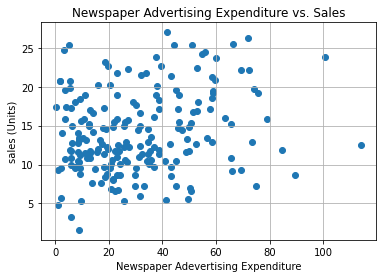

In [28]:
for col in df.columns[:-1]:
    plt.scatter(df[col], df['Sales'])
    plt.xlabel(f'{col} Adevertising Expenditure')
    plt.ylabel('sales (Units)')
    plt.title(f'{col} Advertising Expenditure vs. Sales')
    plt.grid(True)
    plt.show()

<Figure size 720x504 with 0 Axes>

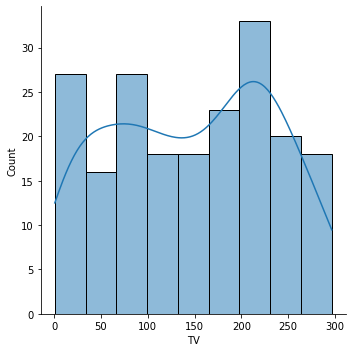

In [29]:
plt.figure(figsize=(10,7))
sns.displot(df['TV'],kde=True)

<Figure size 720x504 with 0 Axes>

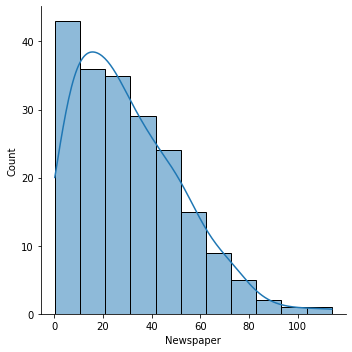

In [30]:
plt.figure(figsize=(10,7))
sns.displot(df['Newspaper'],kde=True)

<Figure size 720x504 with 0 Axes>

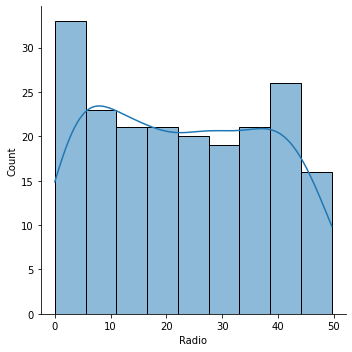

In [31]:
plt.figure(figsize=(10,7))
sns.displot(df['Radio'],kde=True)

<Figure size 720x504 with 0 Axes>

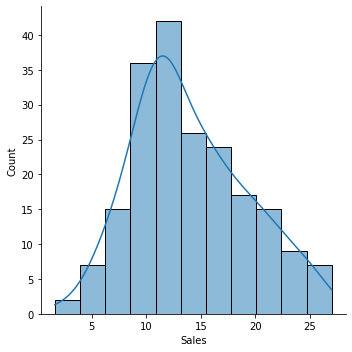

In [32]:
plt.figure(figsize=(10,7))
sns.displot(df['Sales'],kde=True)

<AxesSubplot:>

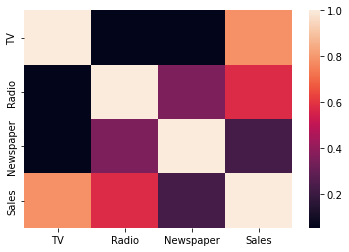

In [33]:
sns.heatmap(df.corr())

<AxesSubplot:>

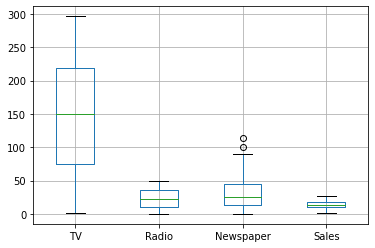

In [34]:
df.boxplot()

In [35]:
import pandas as pd

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

def detect_outliers(column):
    lower_bond = Q1[column] - 1.5 * IQR[column]
    upper_bond = Q3[column] + 1.5 * IQR[column]
    outliers = df[(df[column] < lower_bond) | (df[column] > upper_bond)]
    if outliers.empty:
        return None, 0.0
    else:
        percentage = (len(outliers) / len(df)) * 100
        return column, percentage
    
numeric_columns = df.select_dtypes(include=['number']).columns
columns_with_outliers = [detect_outliers(column) for column in numeric_columns]
columns_with_outliers = [(column, percentage) for column, percentage in columns_with_outliers if column is not None]

for column, percentage in columns_with_outliers:
    print(f"column: {column}, percentage of outliers: {percentage:2f}%")

column: Newspaper, percentage of outliers: 1.000000%


In [36]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range=Q1-1.5*IQR
    upper_range=Q3+1.5*IQR
    return lower_range,upper_range

In [37]:
low_leadtime,high_leadtime=remove_outlier(df['Newspaper'])
df['Newspaper']=np.where(df['Newspaper']>high_leadtime,high_leadtime,df['Newspaper'])
df['Newspaper']=np.where(df['Newspaper']<low_leadtime,low_leadtime,df['Newspaper'])

In [38]:
x=df.drop(['Sales'],axis=1)
y=df['Sales']

In [39]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=142)

In [40]:
print(xtrain.shape)

(160, 3)


In [41]:
print(xtest.shape)

(40, 3)


In [42]:
print(ytrain.shape)

(160,)


In [43]:
print(ytest.shape)

(40,)


In [44]:
scalar=StandardScaler()
scalar.fit(xtrain)
xtrain_sc=scalar.transform(xtrain)
xtest_sc=scalar.transform(xtest)

In [45]:
lr=LinearRegression()
lr.fit(xtrain_sc,ytrain)
ypred_train=lr.predict(xtrain_sc)
ypred_test=lr.predict(xtest_sc)

In [46]:
print(r2_score(ytrain,ypred_train))
print(r2_score(ytest,ypred_test))

0.8951262853783359
0.8999121998584919


In [47]:
rf=RandomForestRegressor(n_estimators=250,max_depth=25,min_samples_split=8,min_samples_leaf=2)
rf.fit(xtrain_sc,ytrain)
ypred_train_rf=rf.predict(xtrain_sc)
ypred_test_rf=rf.predict(xtest_sc)

In [48]:
print(r2_score(ytrain,ypred_train_rf))
print(r2_score(ytest,ypred_test_rf))

0.9900207924270209
0.9758756805814528


In [49]:
XGBoost=xgb.XGBRegressor()            
XGBoost.fit(xtrain_sc,ytrain)
ypred_train_XGBoost = XGBoost.predict(xtrain_sc)
ypred_test_XGBoost = XGBoost.predict(xtest_sc)

In [50]:
print(r2_score(ytrain,ypred_train_XGBoost))
print(r2_score(ytest,ypred_test_XGBoost)) 

0.9999998706510257
0.9665449337701499


In [51]:
las=Lasso(alpha=0.6)
las.fit(xtrain_sc,ytrain)
ypred_train_las = las.predict(xtrain_sc)
ypred_test_las = las.predict(xtest_sc)

In [52]:
print(r2_score(ytrain,ypred_train_las))
print(r2_score(ytest,ypred_test_las)) 

0.8709131606481074
0.8683216243426592


In [53]:
models = pd.DataFrame(
    {
        'Model' : ['LR', 'LR', 'RF', 'RF', 'XGB', 'XGB', 'LS', 'LS'],
        'Group' : [
            'train',
            'test',
            'train',
            'test', 
            'train',
            'test', 
            'train',
            'test'], 
        'Accuracy2' : [
             r2_score(ytrain, ypred_train)*100,
             r2_score(ytest, ypred_test)*100,
             r2_score(ytrain, ypred_train_rf)*100,
             r2_score(ytest, ypred_test_rf)*100,
             r2_score(ytrain, ypred_train_XGBoost)*100,
             r2_score(ytest, ypred_test_XGBoost)*100,
             r2_score(ytrain, ypred_train_las)*100,
             r2_score(ytest, ypred_test_las)*100,
        ]
    }
)

In [54]:
models

,Model,Group,Accuracy2
0,LR,train,89.512629
1,LR,test,89.991220
2,RF,train,99.002079
3,RF,test,97.587568
4,XGB,train,99.999987
5,XGB,test,96.654493
6,LS,train,87.091316
7,LS,test,86.832162


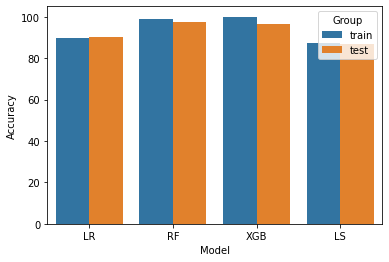

In [55]:
sns.barplot(
    x='Model',
    y='Accuracy2',
    hue='Group',
    data= models
)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.show()

In [56]:
new_data = pd.DataFrame({'TV': [25], 'Radio': [63], 'Newspaper': [80]})
predicted_sales = rf.predict(new_data)
print("Predicted Sales:", predicted_sales)

Predicted Sales: [24.97468729]
